https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [1]:
import pandas as pd

dataframe = pd.read_csv('./data/temps.csv')
dataframe.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


### 2. Lidia con las variables categóricas del dataset

In [4]:
df = pd.get_dummies(dataframe, columns = ['week'])
df

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,42,42,45.2,47,41,50,47,47,0,0,0,0,0,1,0
344,2016,12,28,42,47,45.3,48,41,49,44,58,0,0,0,0,0,0,1
345,2016,12,29,47,48,45.3,48,43,50,45,65,0,0,0,0,1,0,0
346,2016,12,30,48,48,45.4,57,44,46,44,42,1,0,0,0,0,0,0


### 3. Divide en train y test

In [5]:
from sklearn.model_selection import train_test_split

X = df[['year', 'month', 'day', 'temp_2', 'temp_1', 'average', 'forecast_noaa', 'forecast_acc', 'forecast_under',
       'friend', 'week_Fri', 'week_Mon', 'week_Sat', 'week_Sun', 'week_Thurs', 'week_Tues', 'week_Wed']]
y = df['actual']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

### 4. Entrena el modelo
Utiliza un DecisionTreeRegressor

In [6]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth = 2, random_state = 42)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

### 5. Calcula su MAE
Sin usar sklearn

In [10]:
#Con sklearn
import numpy as np
from sklearn.metrics import mean_squared_error

print('Train MSE sklearn: ', mean_squared_error(y_train, tree.predict(X_train)))
print('Test MSE sklearn: ', mean_squared_error(y_test, tree.predict(X_test)))

MSE_formula = np.mean(abs(tree.predict(X_test) - y_test))
print('Test MAE manual: ', MSE_formula)

Train MSE sklearn:  28.62210750879816
Test MSE sklearn:  37.64787660374395
Test MAE manual:  4.888811585240156


### 6. Calcula su MAPE
Sin usar sklearn

In [12]:
from sklearn.metrics import mean_absolute_percentage_error

print('Train MAPE sklearn: ', mean_absolute_percentage_error(y_train, tree.predict(X_train)))
print('Test MAPE sklearn: ', mean_absolute_percentage_error(y_test, tree.predict(X_test)))

MAPE_formula = np.mean(100 * (abs(tree.predict(X_test) - y_test) / tree.predict(X_test)))

print('Test MAPE manual: ',MAPE_formula)

Train MAPE sklearn:  0.06815683252257974
Test MAPE sklearn:  0.07740495191086964
Test MAPE manual:  7.986217601861024


### 7. Representa el árbol de decision

In [13]:
y

0      45
1      44
2      41
3      40
4      44
       ..
343    47
344    48
345    48
346    57
347    40
Name: actual, Length: 348, dtype: int64

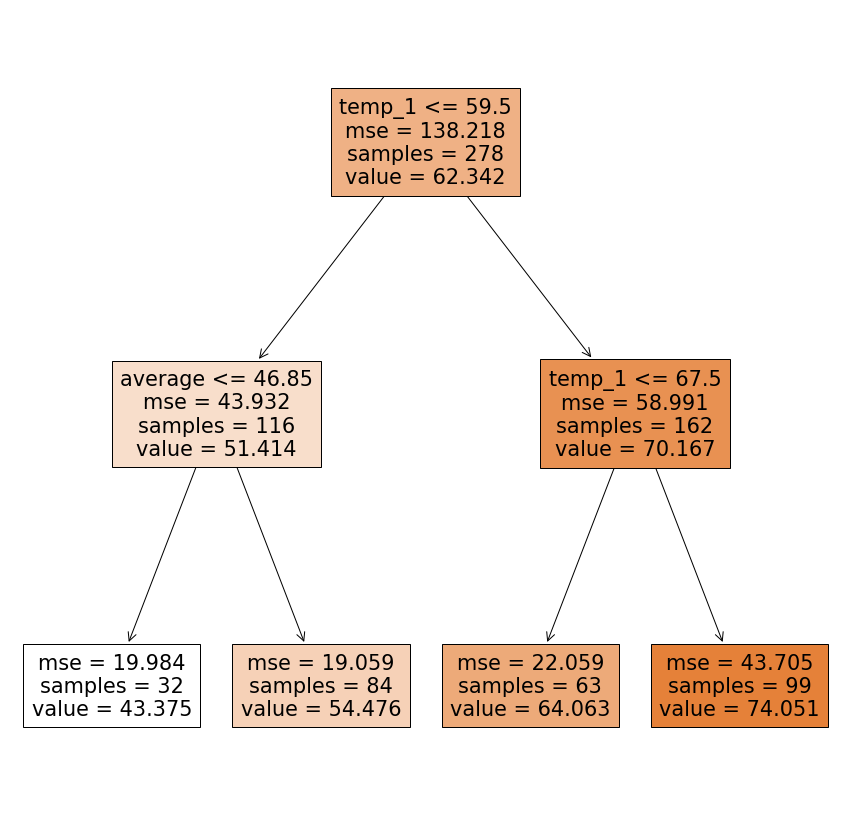

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15,15))
plot_tree(tree,
         feature_names = X.columns,
         class_names = 'actual',
         filled = True);

### 8. Modifica el max_depth a 3 y vuelve a entrenarlo

In [16]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth = 3, random_state = 42)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

### 9. Vuelve a calcular si MAE

In [21]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

print('Train MAPE sklearn: ', mean_absolute_percentage_error(y_train, tree.predict(X_train)))
print('Test MAPE sklearn: ', mean_absolute_percentage_error(y_test, tree.predict(X_test)))

print('Test MAE:', mean_absolute_error(y_test, tree.predict(X_test)))

Train MAPE sklearn:  0.05843352963009388
Test MAPE sklearn:  0.07147155657048516
Test MAE: 4.5567196265742504


### 10. Vuelve a representar su árbol

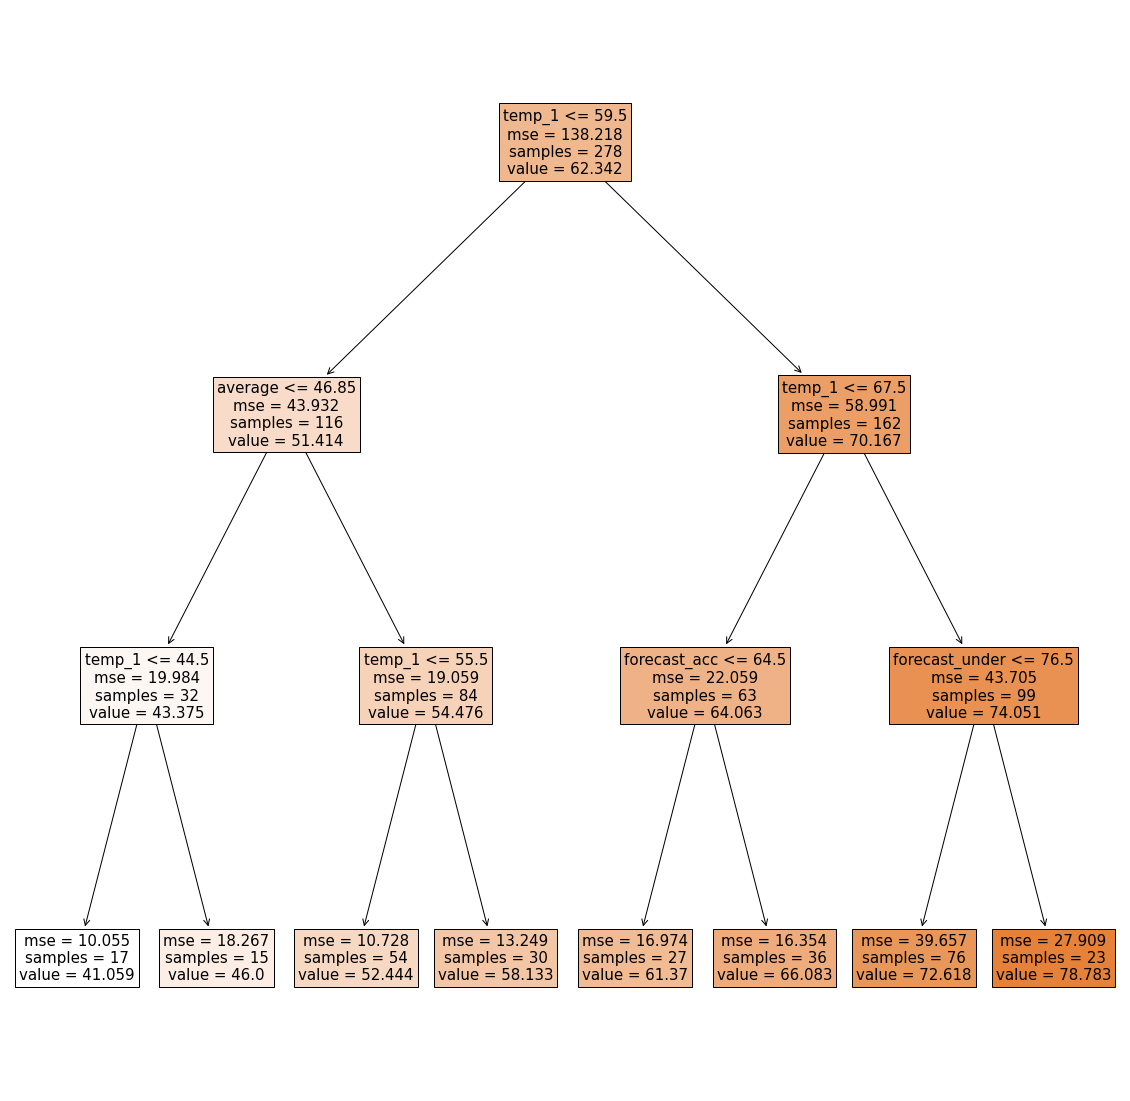

In [24]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
plot_tree(tree,
         feature_names = X.columns,
         class_names = df['actual'],
          fontsize = 15,
         filled = True);

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [27]:
tree.feature_importances_

importance_dict = {'features': X.columns,
                 'Importance': tree.feature_importances_}

pd.DataFrame(importance_dict).sort_values('Importance', ascending = False)

,features,Importance
4,temp_1,0.880208
5,average,0.088412
8,forecast_under,0.020771
7,forecast_acc,0.010610
10,week_Fri,0.000000
15,week_Tues,0.000000
14,week_Thurs,0.000000
13,week_Sun,0.000000
12,week_Sat,0.000000
11,week_Mon,0.000000
